In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import gymnasium as gym

# from bettermdptools.algorithms.planner import Planner
from planner import Planner
from plots import Plots

from bettermdptools.utils.test_env import TestEnv
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.algorithms.rl import RL
import itertools

from utils import update_reward

# Test the VI/PI algorithm without any holes

In [27]:
MAP_SIZE = 16 
P_FROZEN = 0.8 # Probability of tile being frozen
N_ITERS = 300
THETA = 1e-10 # Convergence threshold
GAMMA = 0.9 # Discount factor
RANDOM_SEED = 42
IS_SLIPPERY = False

In [28]:
desc_no_holes = ['SFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFG']

## No slip - VI

In [29]:

frozen_lake = gym.make('FrozenLake-v1', desc=desc_no_holes, is_slippery=IS_SLIPPERY, render_mode="rgb_array")

# frozen_lake = update_reward(frozen_lake)

# reset the map first
s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

# run VI
V, V_track, pi, n_i = Planner(frozen_lake.P).value_iteration(gamma=GAMMA, n_iters=N_ITERS, theta=THETA)

# V is the final value
# V_track is the value of each state at each iteration
# pi is the final policy - mapping states to actions

print(f"n_i : {n_i}")


runtime = 0.02 seconds
n_i : 31


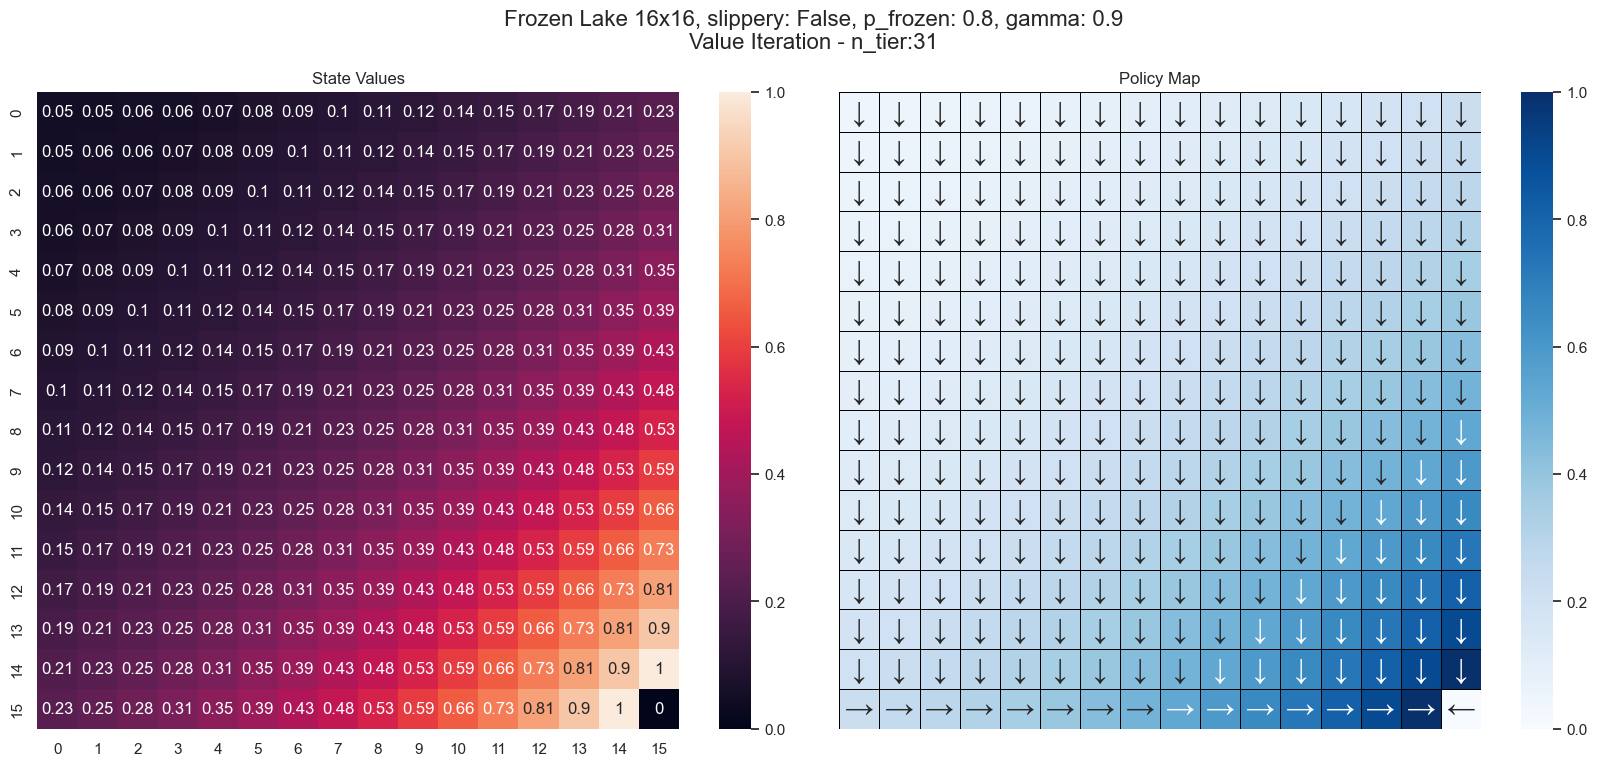

In [30]:
# plot state values
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0, hspace=0)

size=(MAP_SIZE, MAP_SIZE)

Plots.values_heat_map(V, "State Values", size, ax[0])

v_max, directions = Plots.get_policy_map(pi, V, {0: "←", 1: "↓", 2: "→", 3: "↑"}, size)

Plots.plot_policy(v_max, directions=directions, title='Policy Map', ax=ax[1])

fig.suptitle(f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {IS_SLIPPERY}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\nValue Iteration - n_tier:{n_i}', fontsize=16);


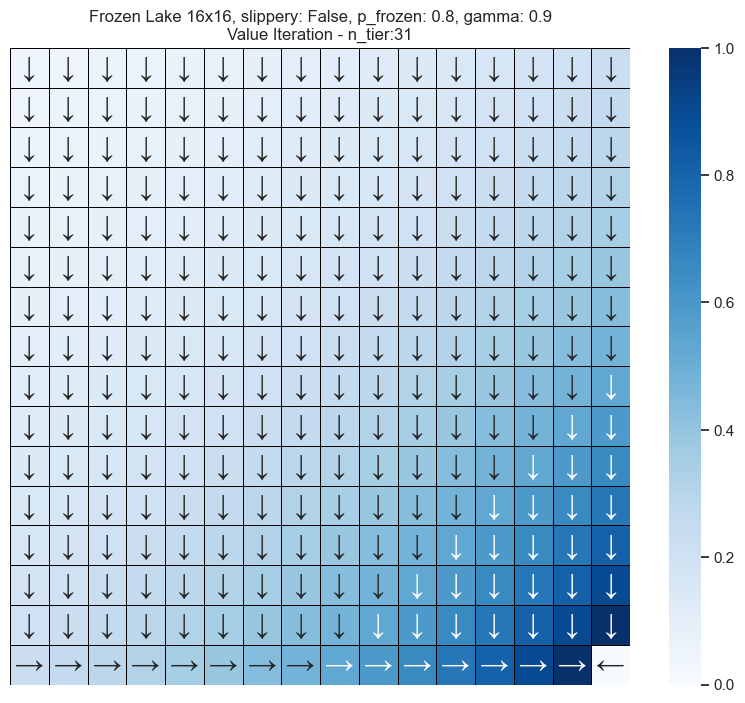

In [31]:
sns.set_theme(rc={'figure.figsize':(10,8.27)})
ax = Plots.plot_policy(v_max, directions=directions, 
                       title=f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {IS_SLIPPERY}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\nValue Iteration - n_tier:{n_i}')

## No slip - PI

In [32]:
frozen_lake = gym.make('FrozenLake-v1', desc=desc_no_holes, is_slippery=IS_SLIPPERY, render_mode="rgb_array")

# frozen_lake = update_reward(frozen_lake)

# reset the map first
s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

# run VI
V, V_track, pi, n_i = Planner(frozen_lake.P).policy_iteration(gamma=GAMMA, n_iters=N_ITERS, theta=THETA)

# V is the final value
# V_track is the value of each state at each iteration
# pi is the final policy - mapping states to actions

print(f"n_i : {n_i}")

runtime = 0.03 seconds
n_i : 29


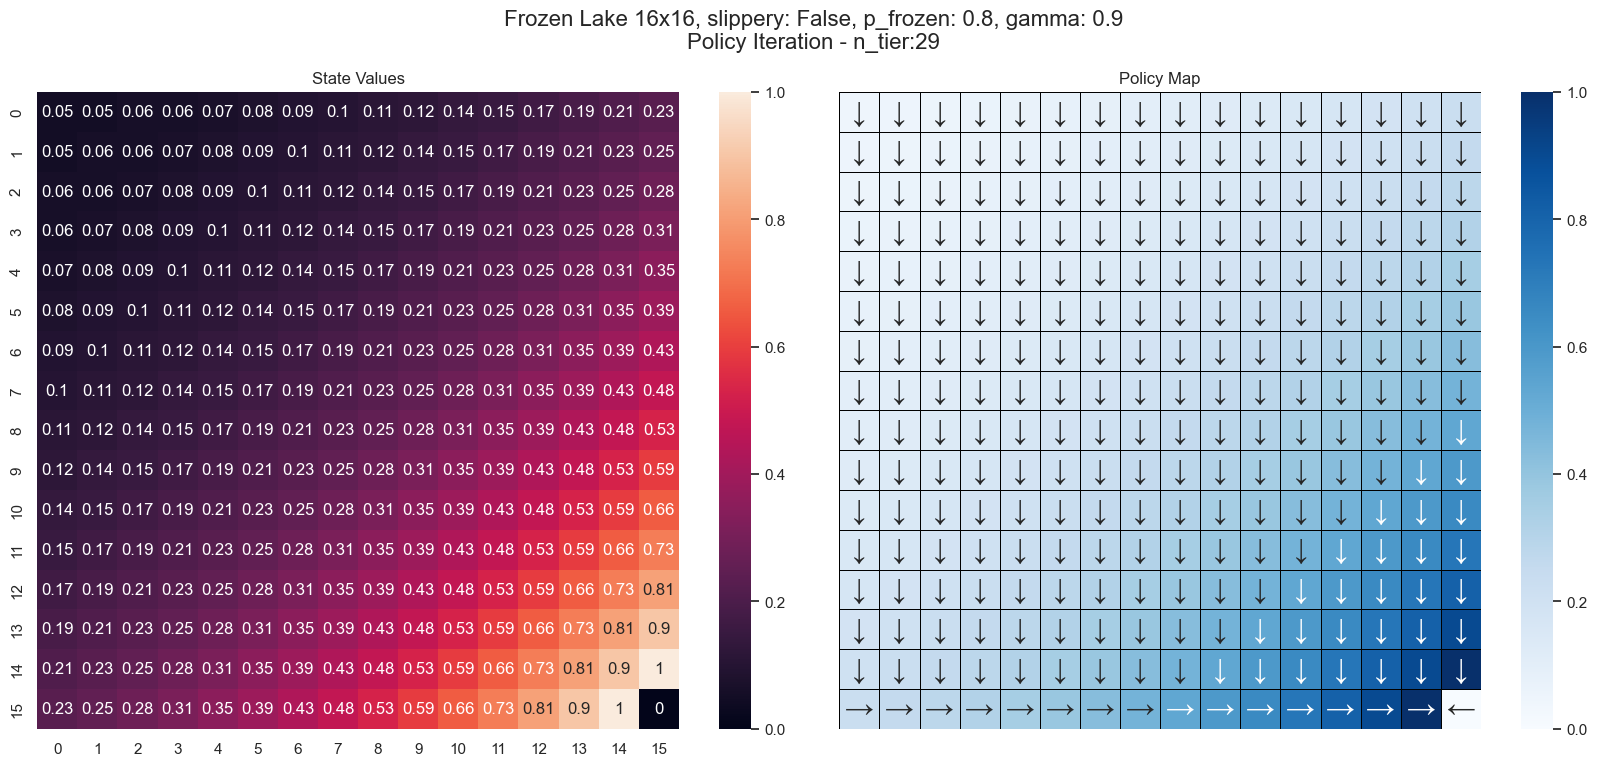

In [33]:
# plot state values
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0, hspace=0)

size=(MAP_SIZE, MAP_SIZE)

Plots.values_heat_map(V, "State Values", size, ax[0])

v_max, directions = Plots.get_policy_map(pi, V, {0: "←", 1: "↓", 2: "→", 3: "↑"}, size)

Plots.plot_policy(v_max, directions=directions, title='Policy Map', ax=ax[1])

fig.suptitle(f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {IS_SLIPPERY}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\nPolicy Iteration - n_tier:{n_i}', fontsize=16);


## Slip - VI

In [34]:
IS_SLIPPERY = True

In [35]:
frozen_lake = gym.make('FrozenLake-v1', desc=desc_no_holes, is_slippery=IS_SLIPPERY, render_mode="rgb_array")

# frozen_lake = update_rewards(frozen_lake)

# reset the map first
s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

# run VI
V, V_track, pi, n_i = Planner(frozen_lake.P).value_iteration(gamma=GAMMA, n_iters=N_ITERS, theta=THETA)

# V is the final value
# V_track is the value of each state at each iteration
# pi is the final policy - mapping states to actions

print(f"n_i : {n_i}")

runtime = 0.24 seconds
n_i : 153


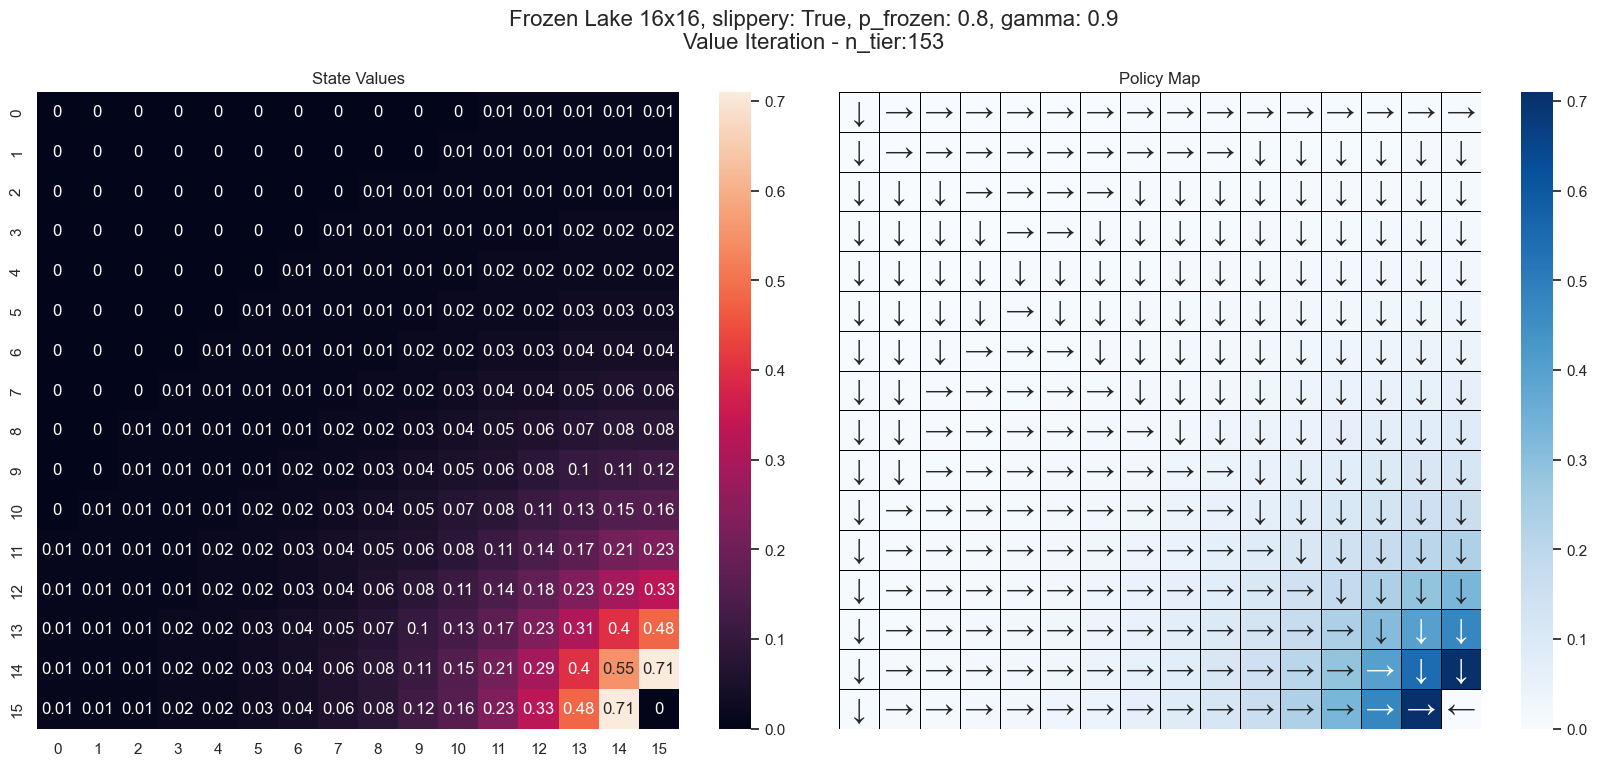

In [36]:
# plot state values
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0, hspace=0)

size=(MAP_SIZE, MAP_SIZE)

Plots.values_heat_map(V, "State Values", size, ax[0])

v_max, directions = Plots.get_policy_map(pi, V, {0: "←", 1: "↓", 2: "→", 3: "↑"}, size)

Plots.plot_policy(v_max, directions=directions, title='Policy Map', ax=ax[1])

fig.suptitle(f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {True}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\nValue Iteration - n_tier:{n_i}', fontsize=16);


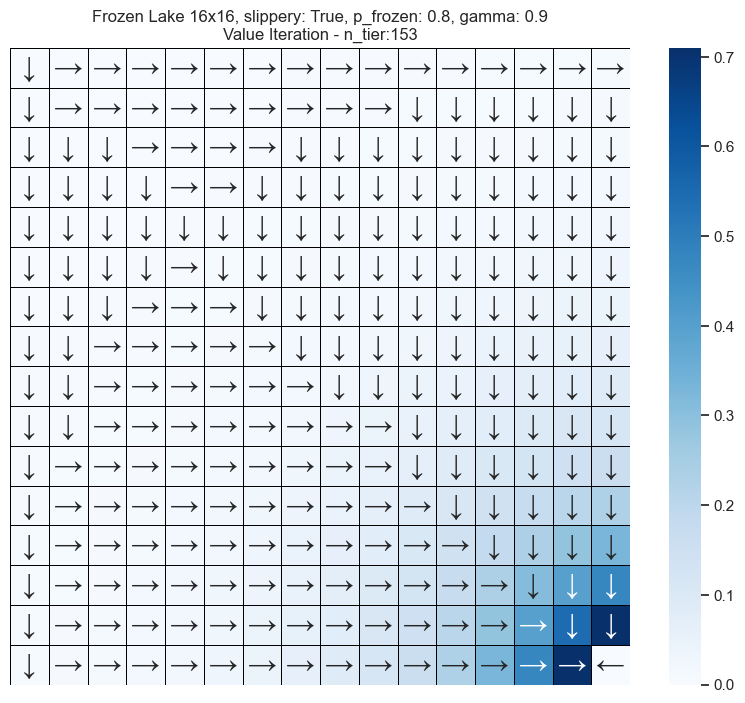

In [37]:
sns.set_theme(rc={'figure.figsize':(10,8.27)})
ax = Plots.plot_policy(v_max, directions=directions, 
                       title=f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {IS_SLIPPERY}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\nValue Iteration - n_tier:{n_i}')

## Slip - PI

In [38]:
frozen_lake = gym.make('FrozenLake-v1', desc=desc_no_holes, is_slippery=IS_SLIPPERY, render_mode="rgb_array")

# frozen_lake = update_rewards(frozen_lake)

# reset the map first
s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

# run VI
V, V_track, pi, n_i = Planner(frozen_lake.P).value_iteration(gamma=GAMMA, n_iters=N_ITERS, theta=THETA)

# V is the final value
# V_track is the value of each state at each iteration
# pi is the final policy - mapping states to actions
print(f"n_i : {n_i}")

runtime = 0.24 seconds
n_i : 153


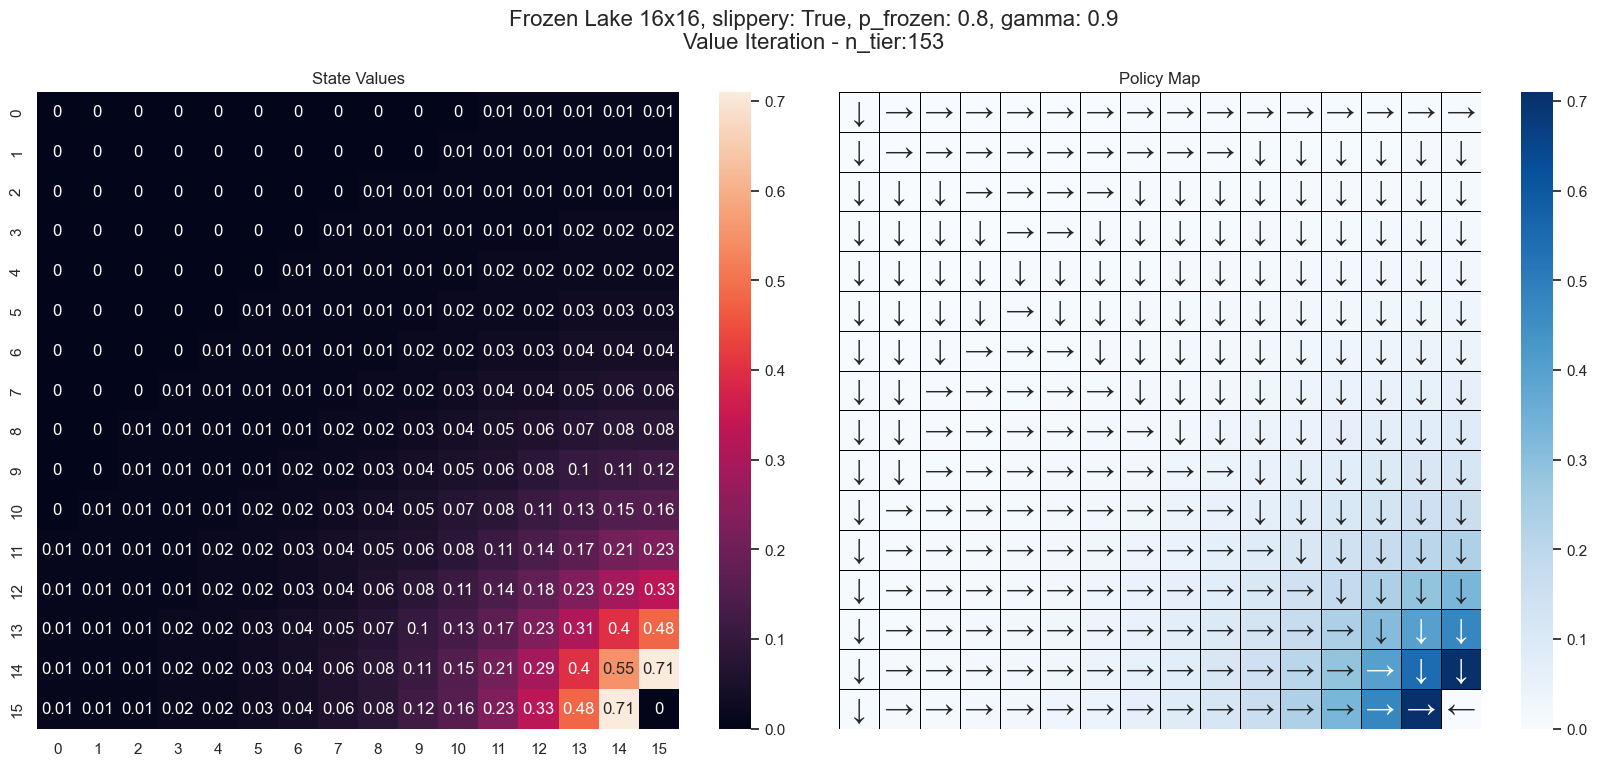

In [14]:
# plot state values
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0, hspace=0)

size=(MAP_SIZE, MAP_SIZE)

Plots.values_heat_map(V, "State Values", size, ax[0])

v_max, directions = Plots.get_policy_map(pi, V, {0: "←", 1: "↓", 2: "→", 3: "↑"}, size)

Plots.plot_policy(v_max, directions=directions, title='Policy Map', ax=ax[1])

fig.suptitle(f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {True}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\nValue Iteration - n_tier:{n_i}', fontsize=16);


# Reward Structuring

1. Reward vs gamma (slip)  hue = 'map_size'
1. Check what happens to the reward vs gamma (slip vs non slip)

In [42]:
grid_res = []

map_sizes = np.arange(10, 30, 2)
p_frozen_values = [0.6, 0.7, 0.8, 0.9, 1]
# p_frozen_values = [0.8]
# gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ]
slippery = [False, True]
move_costs = [0, -0.01]
iter_types = ['value', 'policy']

N_ITERS = 300
THETA = 1e-10
RANDOM_SEED = 42



In [43]:
maps = {}
for map_param in itertools.product(map_sizes, p_frozen_values):

    map_size, p_frozen = map_param
    maps[(map_size, p_frozen)] = generate_random_map(map_size, p_frozen)

In [44]:

for grid_params in itertools.product(map_sizes, p_frozen_values, gamma_values, slippery, move_costs, iter_types):

    map_size, p_frozen, gamma, is_slippery, move_cost, iter_type = grid_params

    print(f"map_size: {map_size}, p_frozen: {p_frozen}, gamma: {gamma}, is_slippery: {is_slippery}, move_cost: {move_cost}, iter_type: {iter_type}, n_i : {n_i}")

    frozen_lake = gym.make('FrozenLake-v1', desc=maps[(map_size, p_frozen)], is_slippery=is_slippery, render_mode="rgb_array")

    frozen_lake = update_reward(frozen_lake, move_cost=move_cost, hole_penalty=-1, goal_reward=2)

    # reset the map first
    s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

    if iter_type == 'value':
        V, V_track, pi, n_i = Planner(frozen_lake.P).value_iteration(gamma=gamma, n_iters=N_ITERS, theta=THETA)
    else:
        V, V_track, pi, n_i = Planner(frozen_lake.P).policy_iteration(gamma=gamma, n_iters=N_ITERS, theta=THETA)

    # V is the final value
    # V_track is the value of each state at each iteration
    # pi is the final policy - mapping states to actions

    episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)

    mean_reward = np.mean(episode_rewards)
    stdev_reward = np.std(episode_rewards)

    grid_res.append({'map_size': map_size, 'p_frozen': p_frozen, 'gamma': gamma, 'is_slippery':  is_slippery, 'move_cost': move_cost, 
                     'iter_type': iter_type, 'n_i': n_i, 
                     'mean_reward': mean_reward, 'stdev_reward': stdev_reward})


map_size: 10, p_frozen: 0.6, gamma: 0.1, is_slippery: False, move_cost: 0, iter_type: value, n_i : 153
runtime = 0.00 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.1, is_slippery: False, move_cost: 0, iter_type: policy, n_i : 12
runtime = 0.02 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.1, is_slippery: False, move_cost: -0.01, iter_type: value, n_i : 12
runtime = 0.01 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.1, is_slippery: False, move_cost: -0.01, iter_type: policy, n_i : 12
runtime = 0.02 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.1, is_slippery: True, move_cost: 0, iter_type: value, n_i : 15
runtime = 0.00 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.1, is_slippery: True, move_cost: 0, iter_type: policy, n_i : 10
runtime = 0.00 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.1, is_slippery: True, move_cost: -0.01, iter_type: value, n_i : 7
runtime = 0.02 seconds


c:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


map_size: 10, p_frozen: 0.6, gamma: 0.1, is_slippery: True, move_cost: -0.01, iter_type: policy, n_i : 10
runtime = 0.00 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.2, is_slippery: False, move_cost: 0, iter_type: value, n_i : 6
runtime = 0.00 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.2, is_slippery: False, move_cost: 0, iter_type: policy, n_i : 16
runtime = 0.02 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.2, is_slippery: False, move_cost: -0.01, iter_type: value, n_i : 14
runtime = 0.00 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.2, is_slippery: False, move_cost: -0.01, iter_type: policy, n_i : 16
runtime = 0.01 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.2, is_slippery: True, move_cost: 0, iter_type: value, n_i : 16
runtime = 0.01 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.2, is_slippery: True, move_cost: 0, iter_type: policy, n_i : 14
runtime = 0.02 seconds
map_size: 10, p_frozen: 0.6, gamma: 0.2, is_slippery: True, move_cost: -0.01, iter_type: value, n_i : 11
runtime 

c:\Users\pavan\OneDrive\Documents\GaTech\CS7641_Lectures\PS_4\planner.py:126: UserWarning: Max iterations reached before convergence.  Check n_iters.
  warnings.warn("Max iterations reached before convergence.  Check n_iters.")


runtime = 0.72 seconds
map_size: 20, p_frozen: 0.6, gamma: 0.2, is_slippery: True, move_cost: -0.01, iter_type: value, n_i : 299
runtime = 0.02 seconds
map_size: 20, p_frozen: 0.6, gamma: 0.2, is_slippery: True, move_cost: -0.01, iter_type: policy, n_i : 13
runtime = 0.02 seconds
map_size: 20, p_frozen: 0.6, gamma: 0.3, is_slippery: False, move_cost: 0, iter_type: value, n_i : 6
runtime = 0.02 seconds
map_size: 20, p_frozen: 0.6, gamma: 0.3, is_slippery: False, move_cost: 0, iter_type: policy, n_i : 21
runtime = 0.06 seconds
map_size: 20, p_frozen: 0.6, gamma: 0.3, is_slippery: False, move_cost: -0.01, iter_type: value, n_i : 34
runtime = 0.04 seconds
map_size: 20, p_frozen: 0.6, gamma: 0.3, is_slippery: False, move_cost: -0.01, iter_type: policy, n_i : 21
runtime = 0.07 seconds
map_size: 20, p_frozen: 0.6, gamma: 0.3, is_slippery: True, move_cost: 0, iter_type: value, n_i : 30
runtime = 0.04 seconds
map_size: 20, p_frozen: 0.6, gamma: 0.3, is_slippery: True, move_cost: 0, iter_type: p

In [45]:
grid_res_df = pd.DataFrame(grid_res)

In [46]:
grid_res_df.to_csv('./data/frozen_lake_results.csv', index=False)

In [2]:
grid_res_df = pd.read_csv('./data/frozen_lake_results.csv')

In [3]:
grid_res_df.head()

map_size  p_frozen  gamma  is_slippery  move_cost iter_type  n_i  \
0        10       0.6    0.1        False       0.00     value   12   
1        10       0.6    0.1        False       0.00    policy   12   
2        10       0.6    0.1        False      -0.01     value   12   
3        10       0.6    0.1        False      -0.01    policy   15   
4        10       0.6    0.1         True       0.00     value   10   

   mean_reward  stdev_reward  
0         0.00  0.000000e+00  
1         2.00  0.000000e+00  
2        -1.00  2.220446e-16  
3         1.83  0.000000e+00  
4         0.00  0.000000e+00

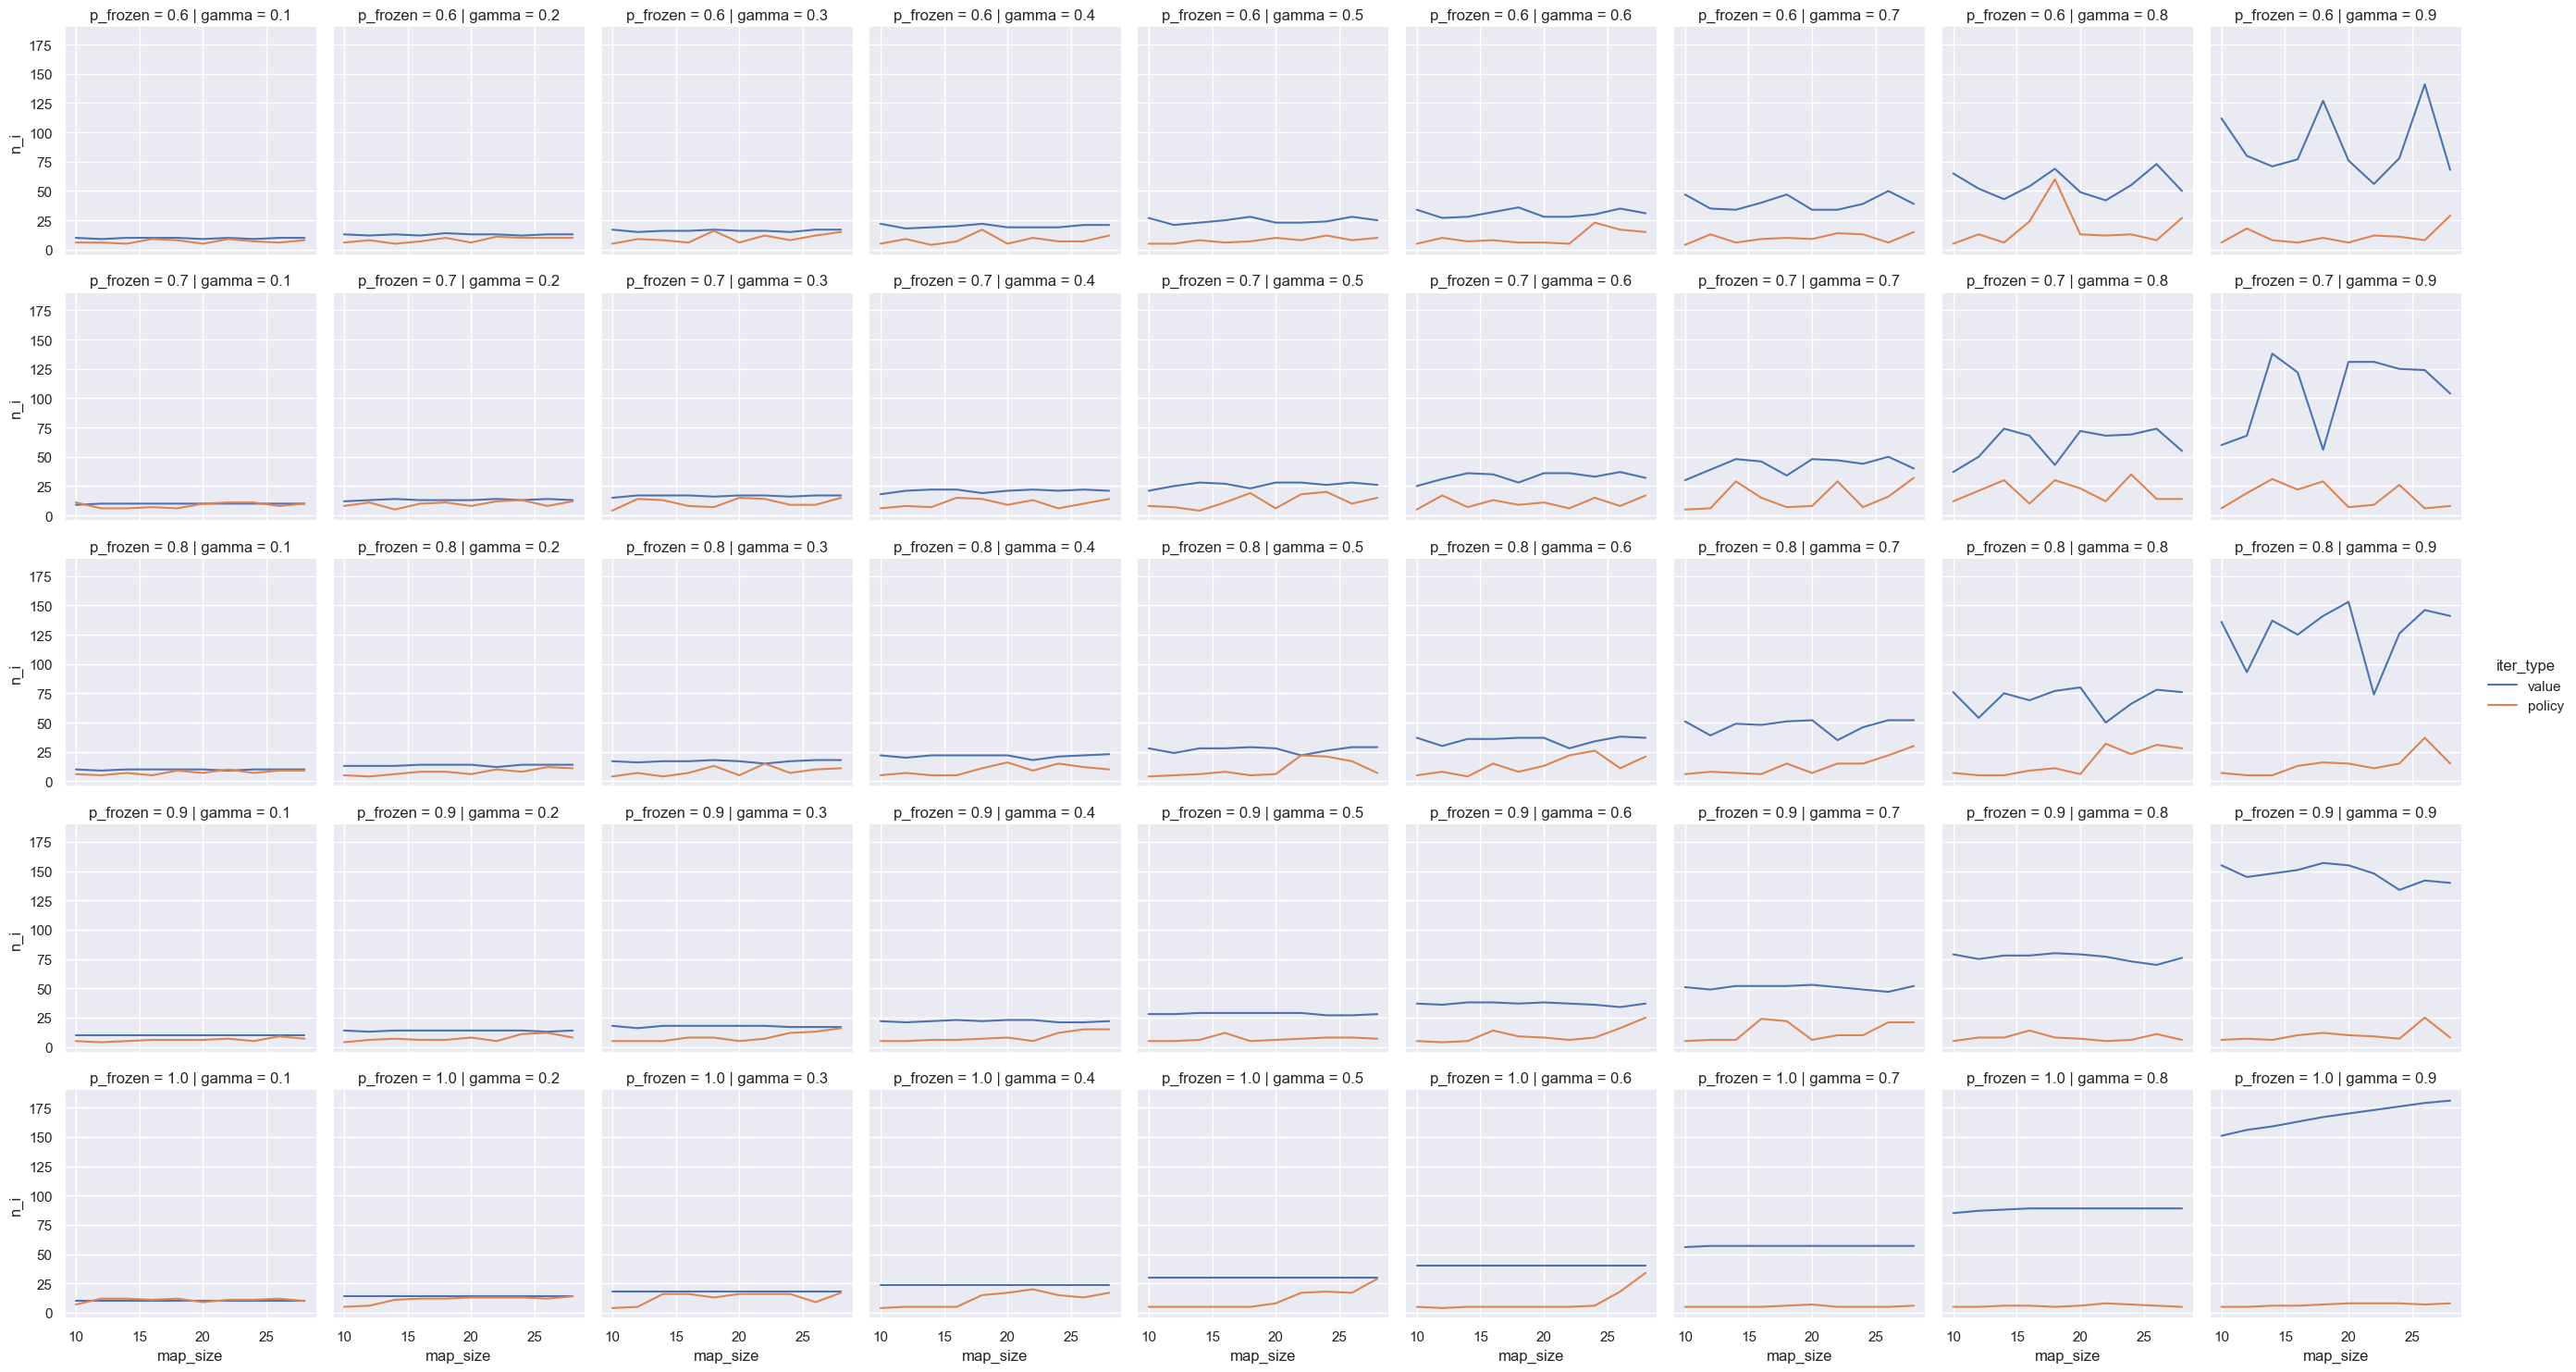

In [4]:
# Plot of n_iter with map_size (slip and no _slip)
# sns.set_theme(rc={'figure.figsize':(10,8.27)})

plot_df = grid_res_df.query("move_cost == -0.01 & is_slippery == True")
g = sns.FacetGrid(plot_df, col="gamma", row="p_frozen", hue="iter_type")
g.map(sns.lineplot, "map_size", "n_i").add_legend();


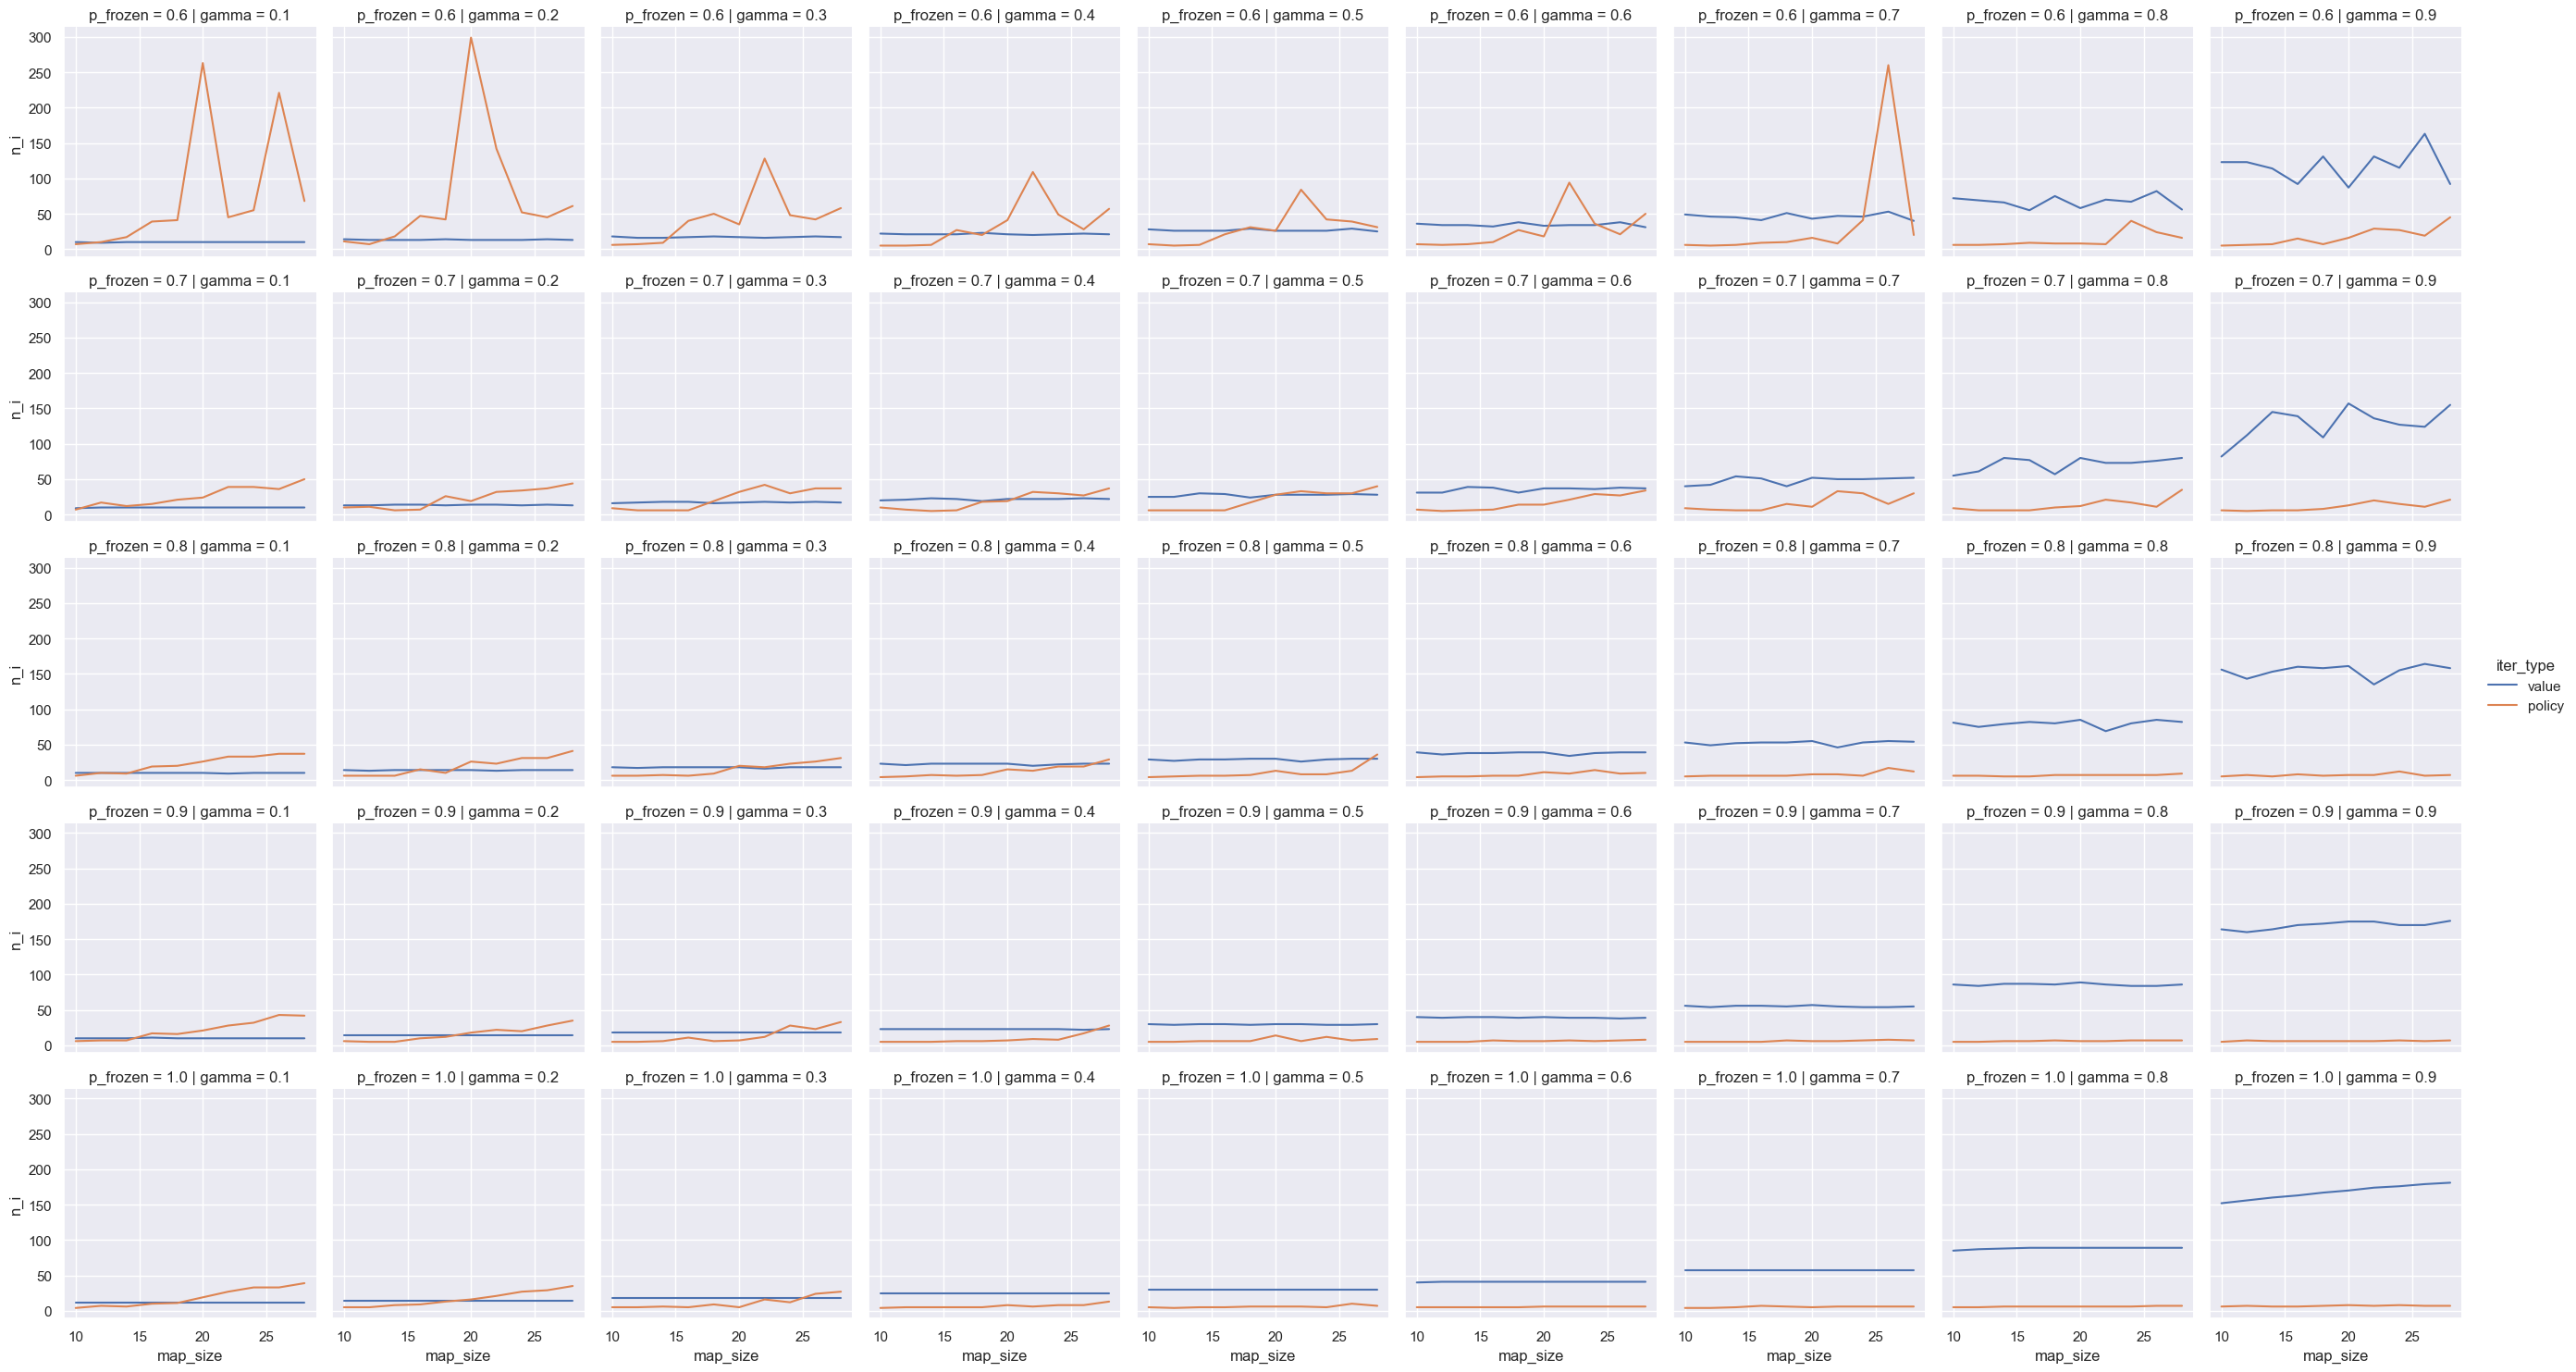

In [7]:
# Plot of n_iter with map_size (slip and no _slip)
plot_df = grid_res_df.query("move_cost == 0 & is_slippery == True")
g = sns.FacetGrid(plot_df, col="gamma", row="p_frozen", hue="iter_type")
g.map(sns.lineplot, "map_size", "n_i").add_legend();

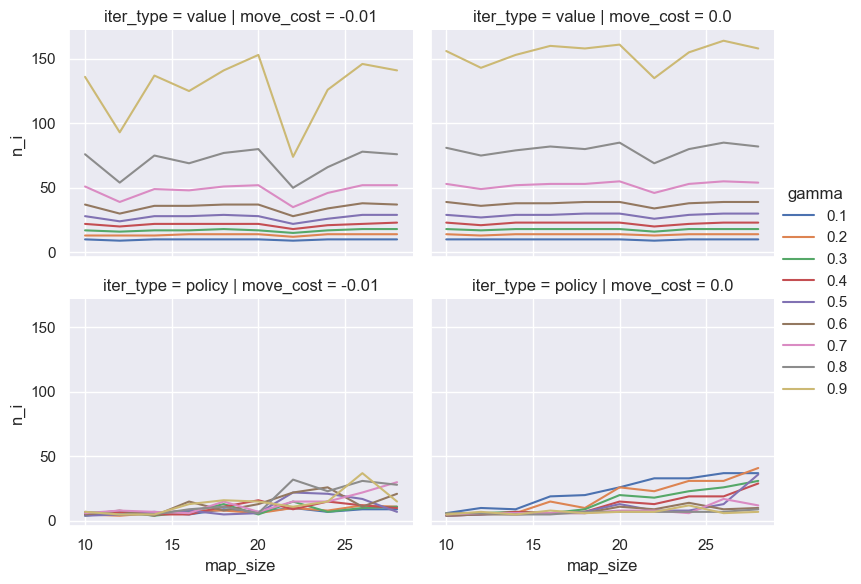

In [11]:
# Plot of n_iter with map_size (slip and no _slip)

plot_df = grid_res_df.query("p_frozen == 0.8 & is_slippery == True")
g = sns.FacetGrid(plot_df, col="move_cost", row="iter_type", hue="gamma", height=3, aspect= 1.33)
g.map(sns.lineplot, "map_size", "n_i").add_legend();


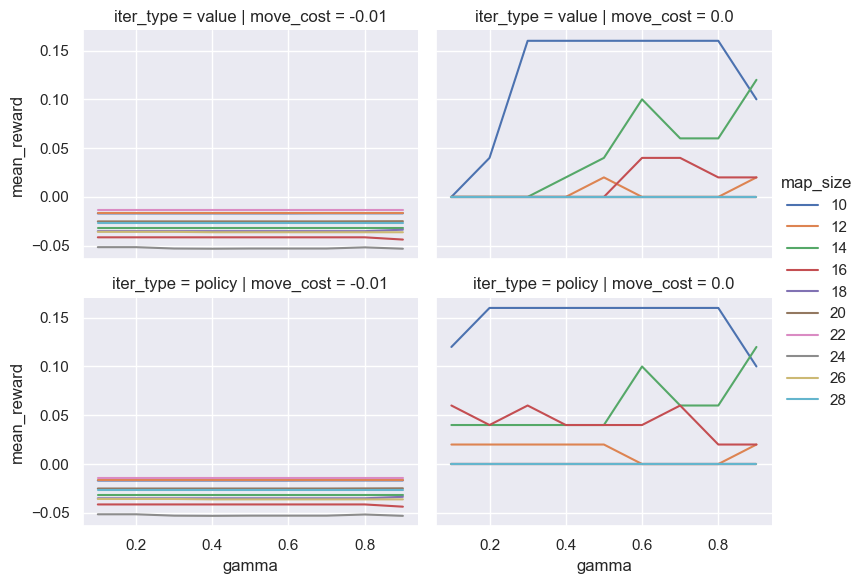

In [12]:
# Plot of n_iter with map_size (slip and no _slip)
sns.set_theme(rc={'figure.figsize':(15, 15)})

plot_df = grid_res_df.query("p_frozen == 0.8 & is_slippery == True")
g = sns.FacetGrid(plot_df, col="move_cost", row="iter_type", hue='map_size', height=3, aspect= 1.33)
g.map(sns.lineplot, "gamma", "mean_reward").add_legend();

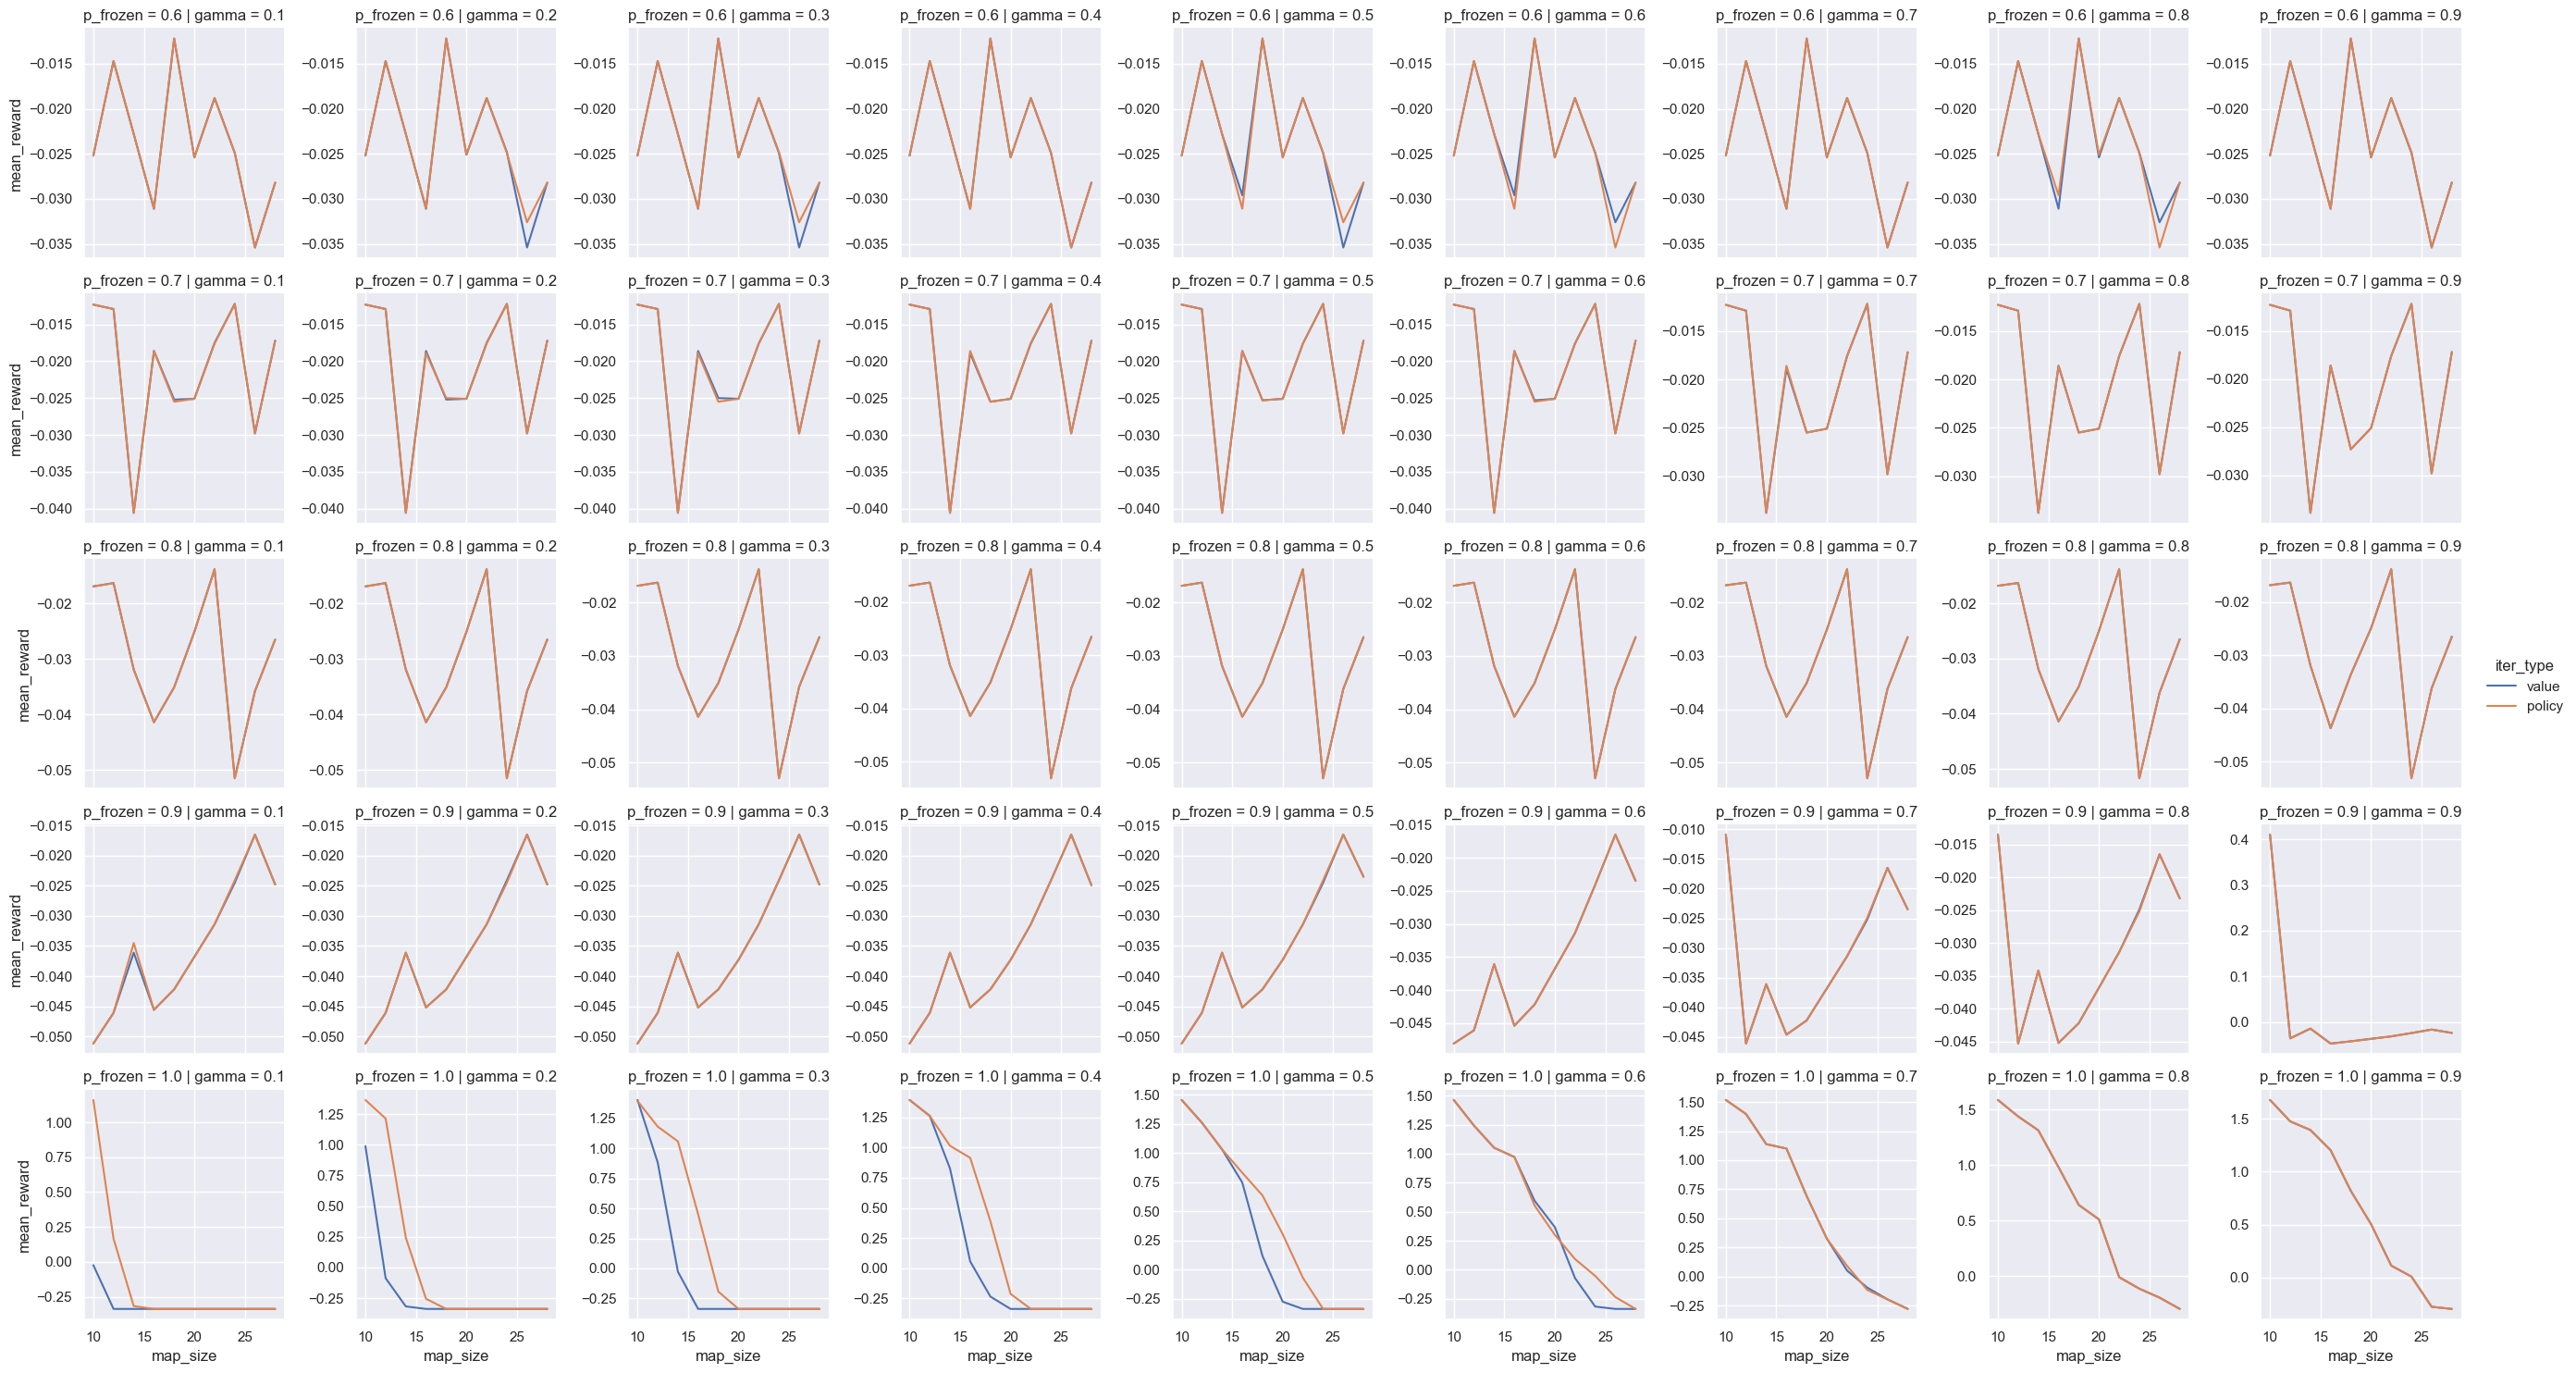

In [54]:
#  Show the reward distribution for different gamma (rows) and p_frozen (columns)
#  hue is the iter_type
#  x is the map_size

plot_df = grid_res_df.query("move_cost == -0.01 & is_slippery == True")
g = sns.FacetGrid(plot_df, col="gamma", row="p_frozen", hue="iter_type", sharey=False)
g.map(sns.lineplot, "map_size", "mean_reward").add_legend();


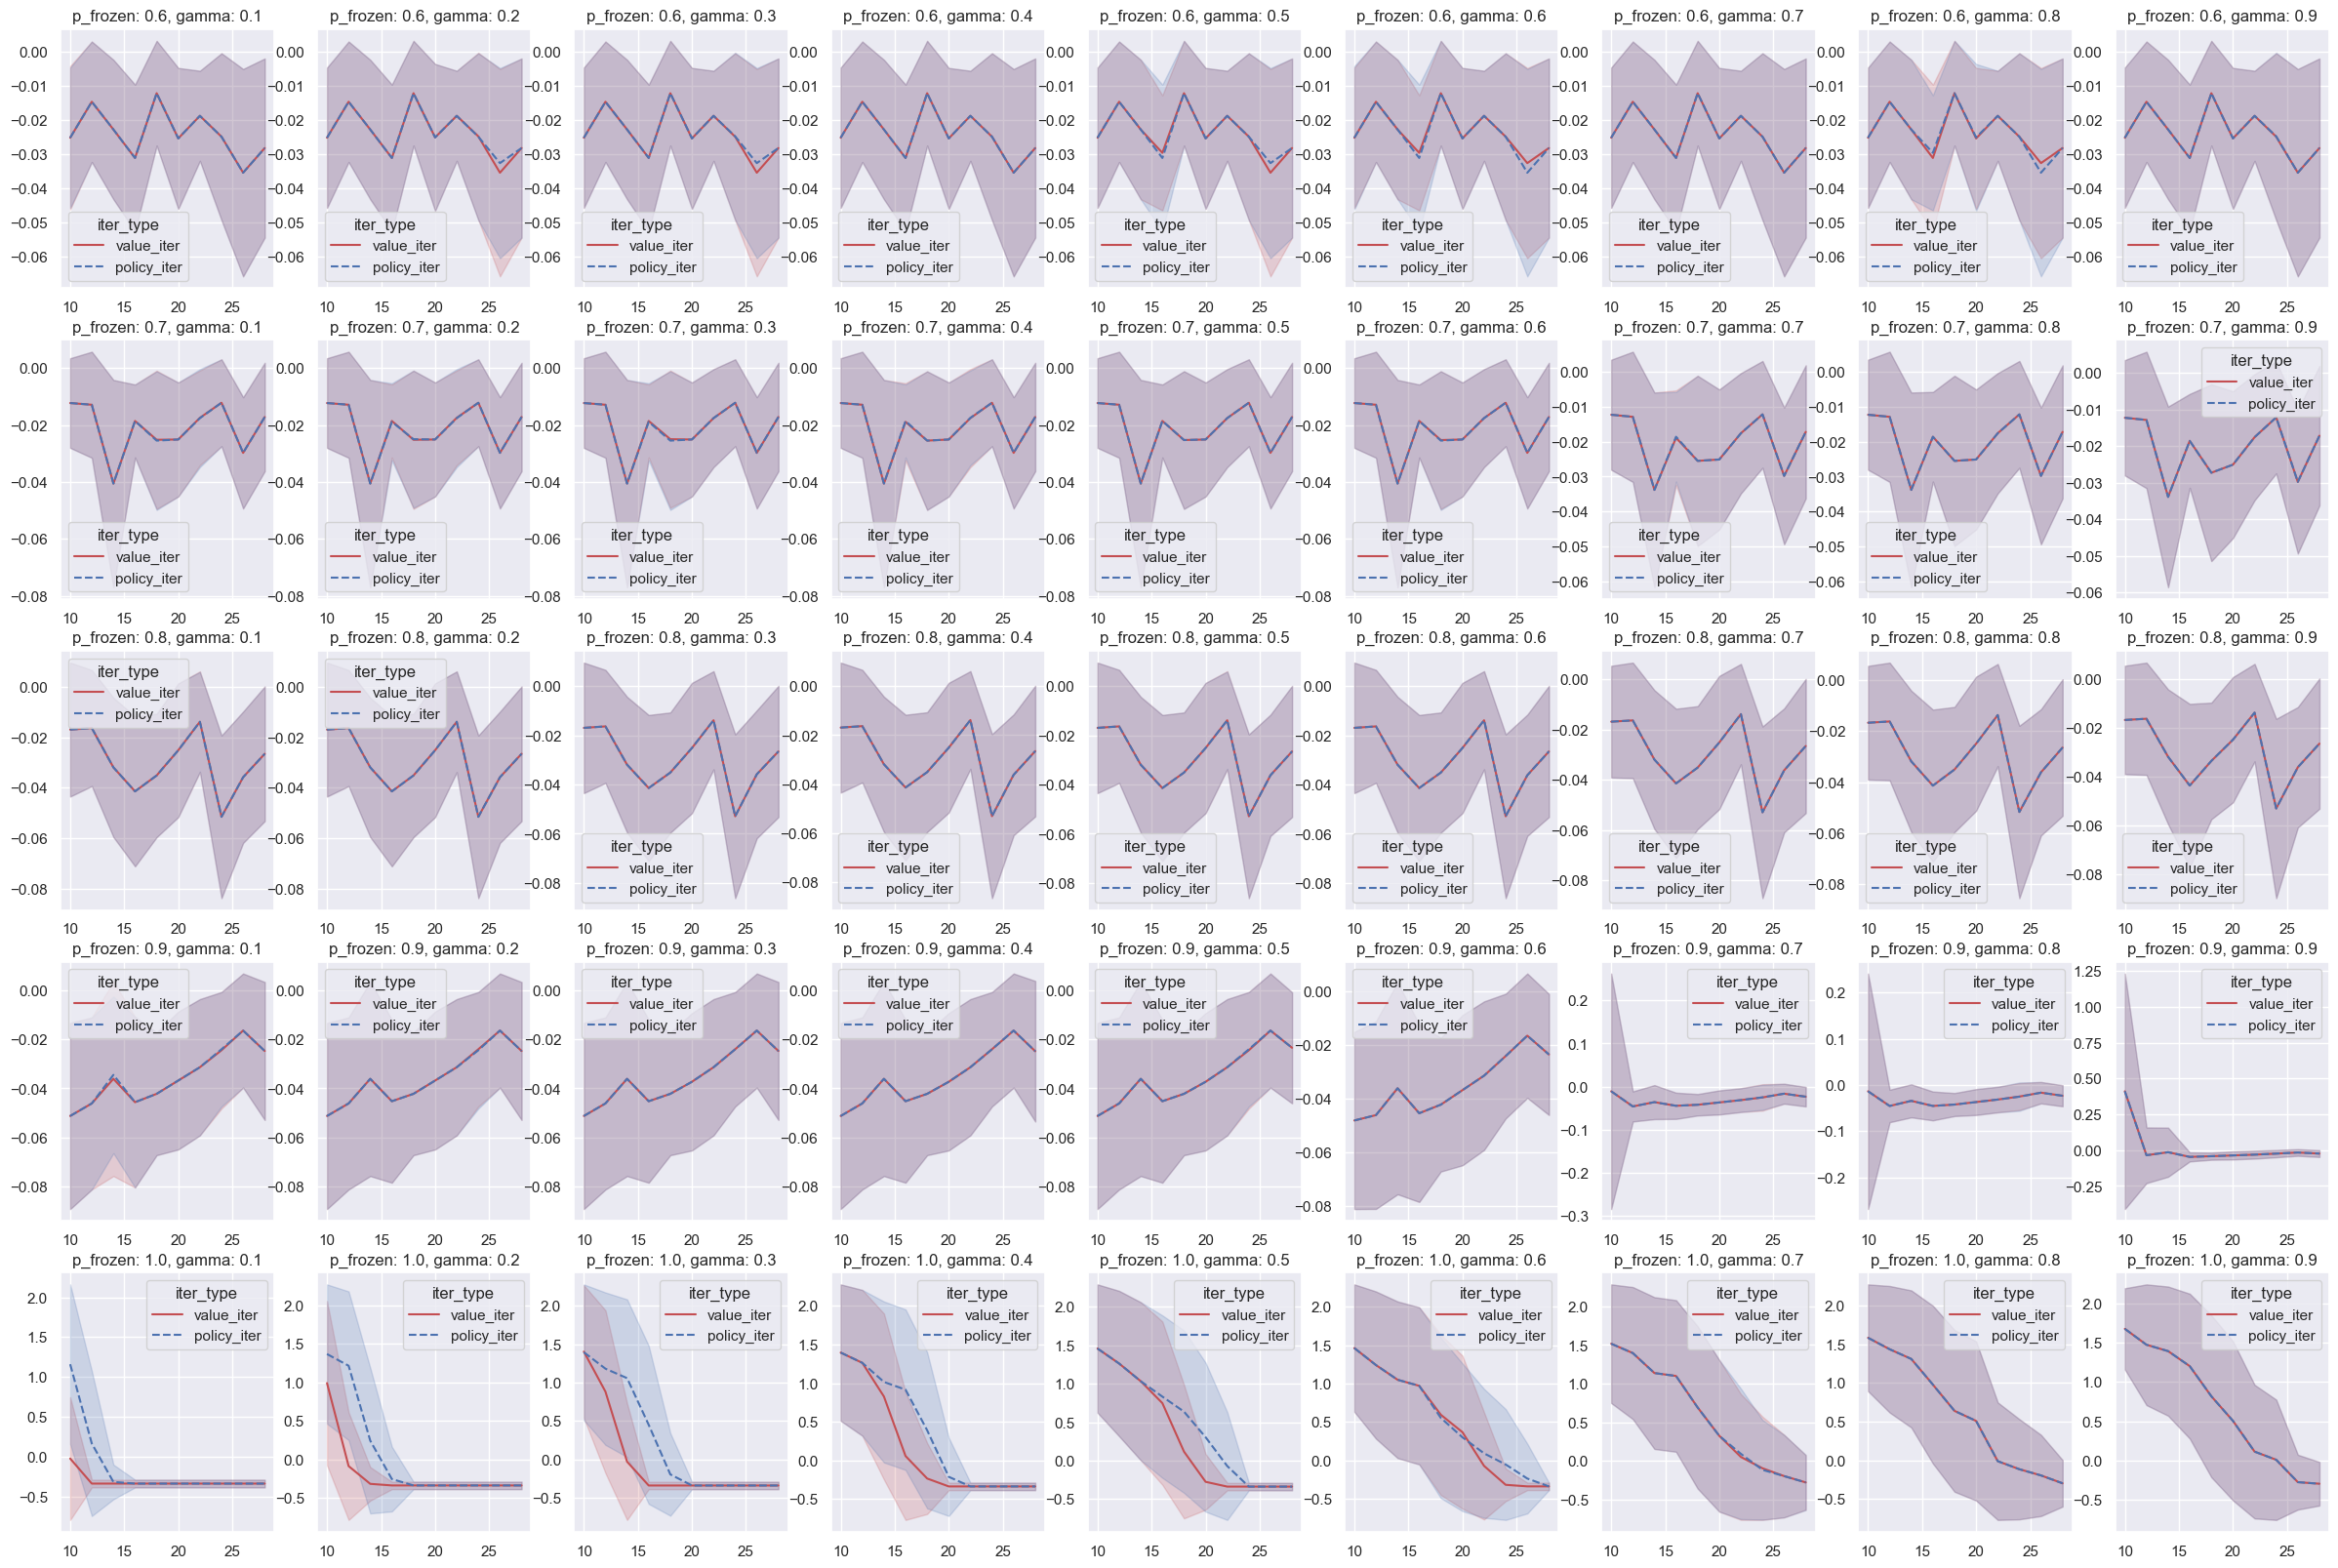

In [64]:
# Code from : https://stackoverflow.com/a/61369662/6931113

p_frozen_values = grid_res_df['p_frozen'].unique()
gamma_values = grid_res_df['gamma'].unique()

fig, ax = plt.subplots(len(p_frozen_values), len(gamma_values), figsize=(30, 20))

for i, p_frozen in enumerate(p_frozen_values):
    for j, gamma in enumerate(gamma_values):

        plot_df = grid_res_df.query(f"move_cost == -0.01 & is_slippery == True & p_frozen == {p_frozen} & gamma == {gamma} and iter_type == 'value'")

        ax[i, j].plot(plot_df['map_size'], plot_df['mean_reward'], 'r-', label='value_iter')
        ax[i, j].fill_between(plot_df['map_size'], plot_df['mean_reward'] - plot_df['stdev_reward'], plot_df['mean_reward'] + plot_df['stdev_reward'], color='r', alpha=0.2)

        plot_df = grid_res_df.query(f"move_cost == -0.01 & is_slippery == True & p_frozen == {p_frozen} & gamma == {gamma} and iter_type == 'policy'")

        ax[i, j].plot(plot_df['map_size'], plot_df['mean_reward'], 'b--', label='policy_iter')
        ax[i, j].fill_between(plot_df['map_size'], plot_df['mean_reward'] - plot_df['stdev_reward'], plot_df['mean_reward'] + plot_df['stdev_reward'], color='b', alpha=0.2)

        ax[i, j].set_title(f"p_frozen: {p_frozen}, gamma: {gamma}")
        ax[i, j].legend(title='iter_type')
        


        # sns.lineplot(plot_df, x="map_size", y="mean_reward", hue="iter_type").set_title(f"mean_reward vs map_size (slippery) p_frozen: {p_frozen}, gamma: {gamma}")


# plt.plot(x, mean_1, 'b-', label='mean_1')
# plt.fill_between(x, mean_1 - std_1, mean_1 + std_1, color='b', alpha=0.2)
# plt.plot(x, mean_2, 'r--', label='mean_2')
# plt.fill_between(x, mean_2 - std_2, mean_2 + std_2, color='r', alpha=0.2)

# plt.legend(title='title')
# plt.show()

In [ ]:
# load runtimes

In [13]:
runtimes_df = pd.read_csv('./data/frozen_lake_runtimes.csv')

In [14]:
runtimes_df.head()

map_size  p_frozen  gamma is_slippery  move_cost iter_type    n_i  \
0       10       0.6    0.1       False       0.00     value  153.0   
1       10       0.6    0.1       False       0.00    policy   12.0   
2       10       0.6    0.1       False      -0.01     value   12.0   
3       10       0.6    0.1       False      -0.01    policy   12.0   
4       10       0.6    0.1        True       0.00     value   15.0   

   runtime(s)  
0        0.00  
1        0.02  
2        0.01  
3        0.02  
4        0.00

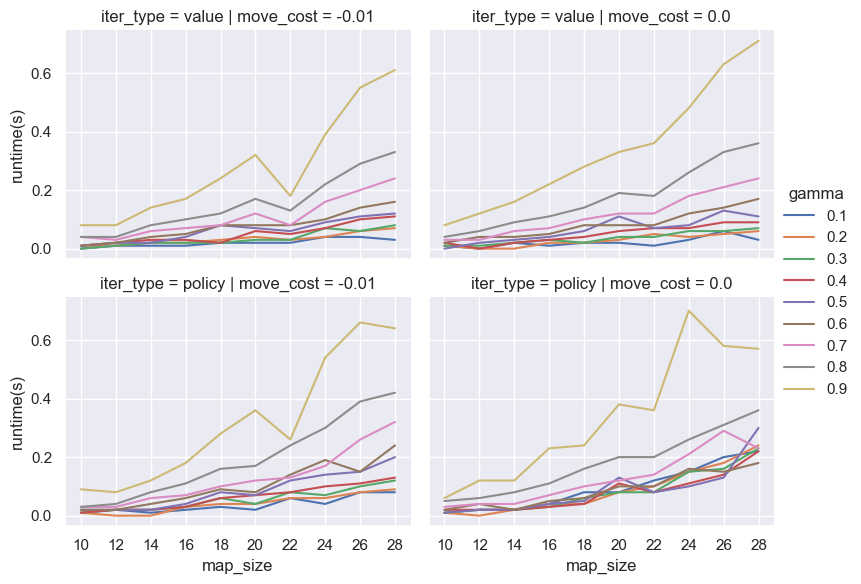

In [16]:

plot_df = runtimes_df.query("p_frozen == 0.8 & is_slippery == True")
g = sns.FacetGrid(plot_df, col="move_cost", row="iter_type", hue="gamma", height=3, aspect= 1.33)
g.map(sns.lineplot, "map_size", "runtime(s)").add_legend();

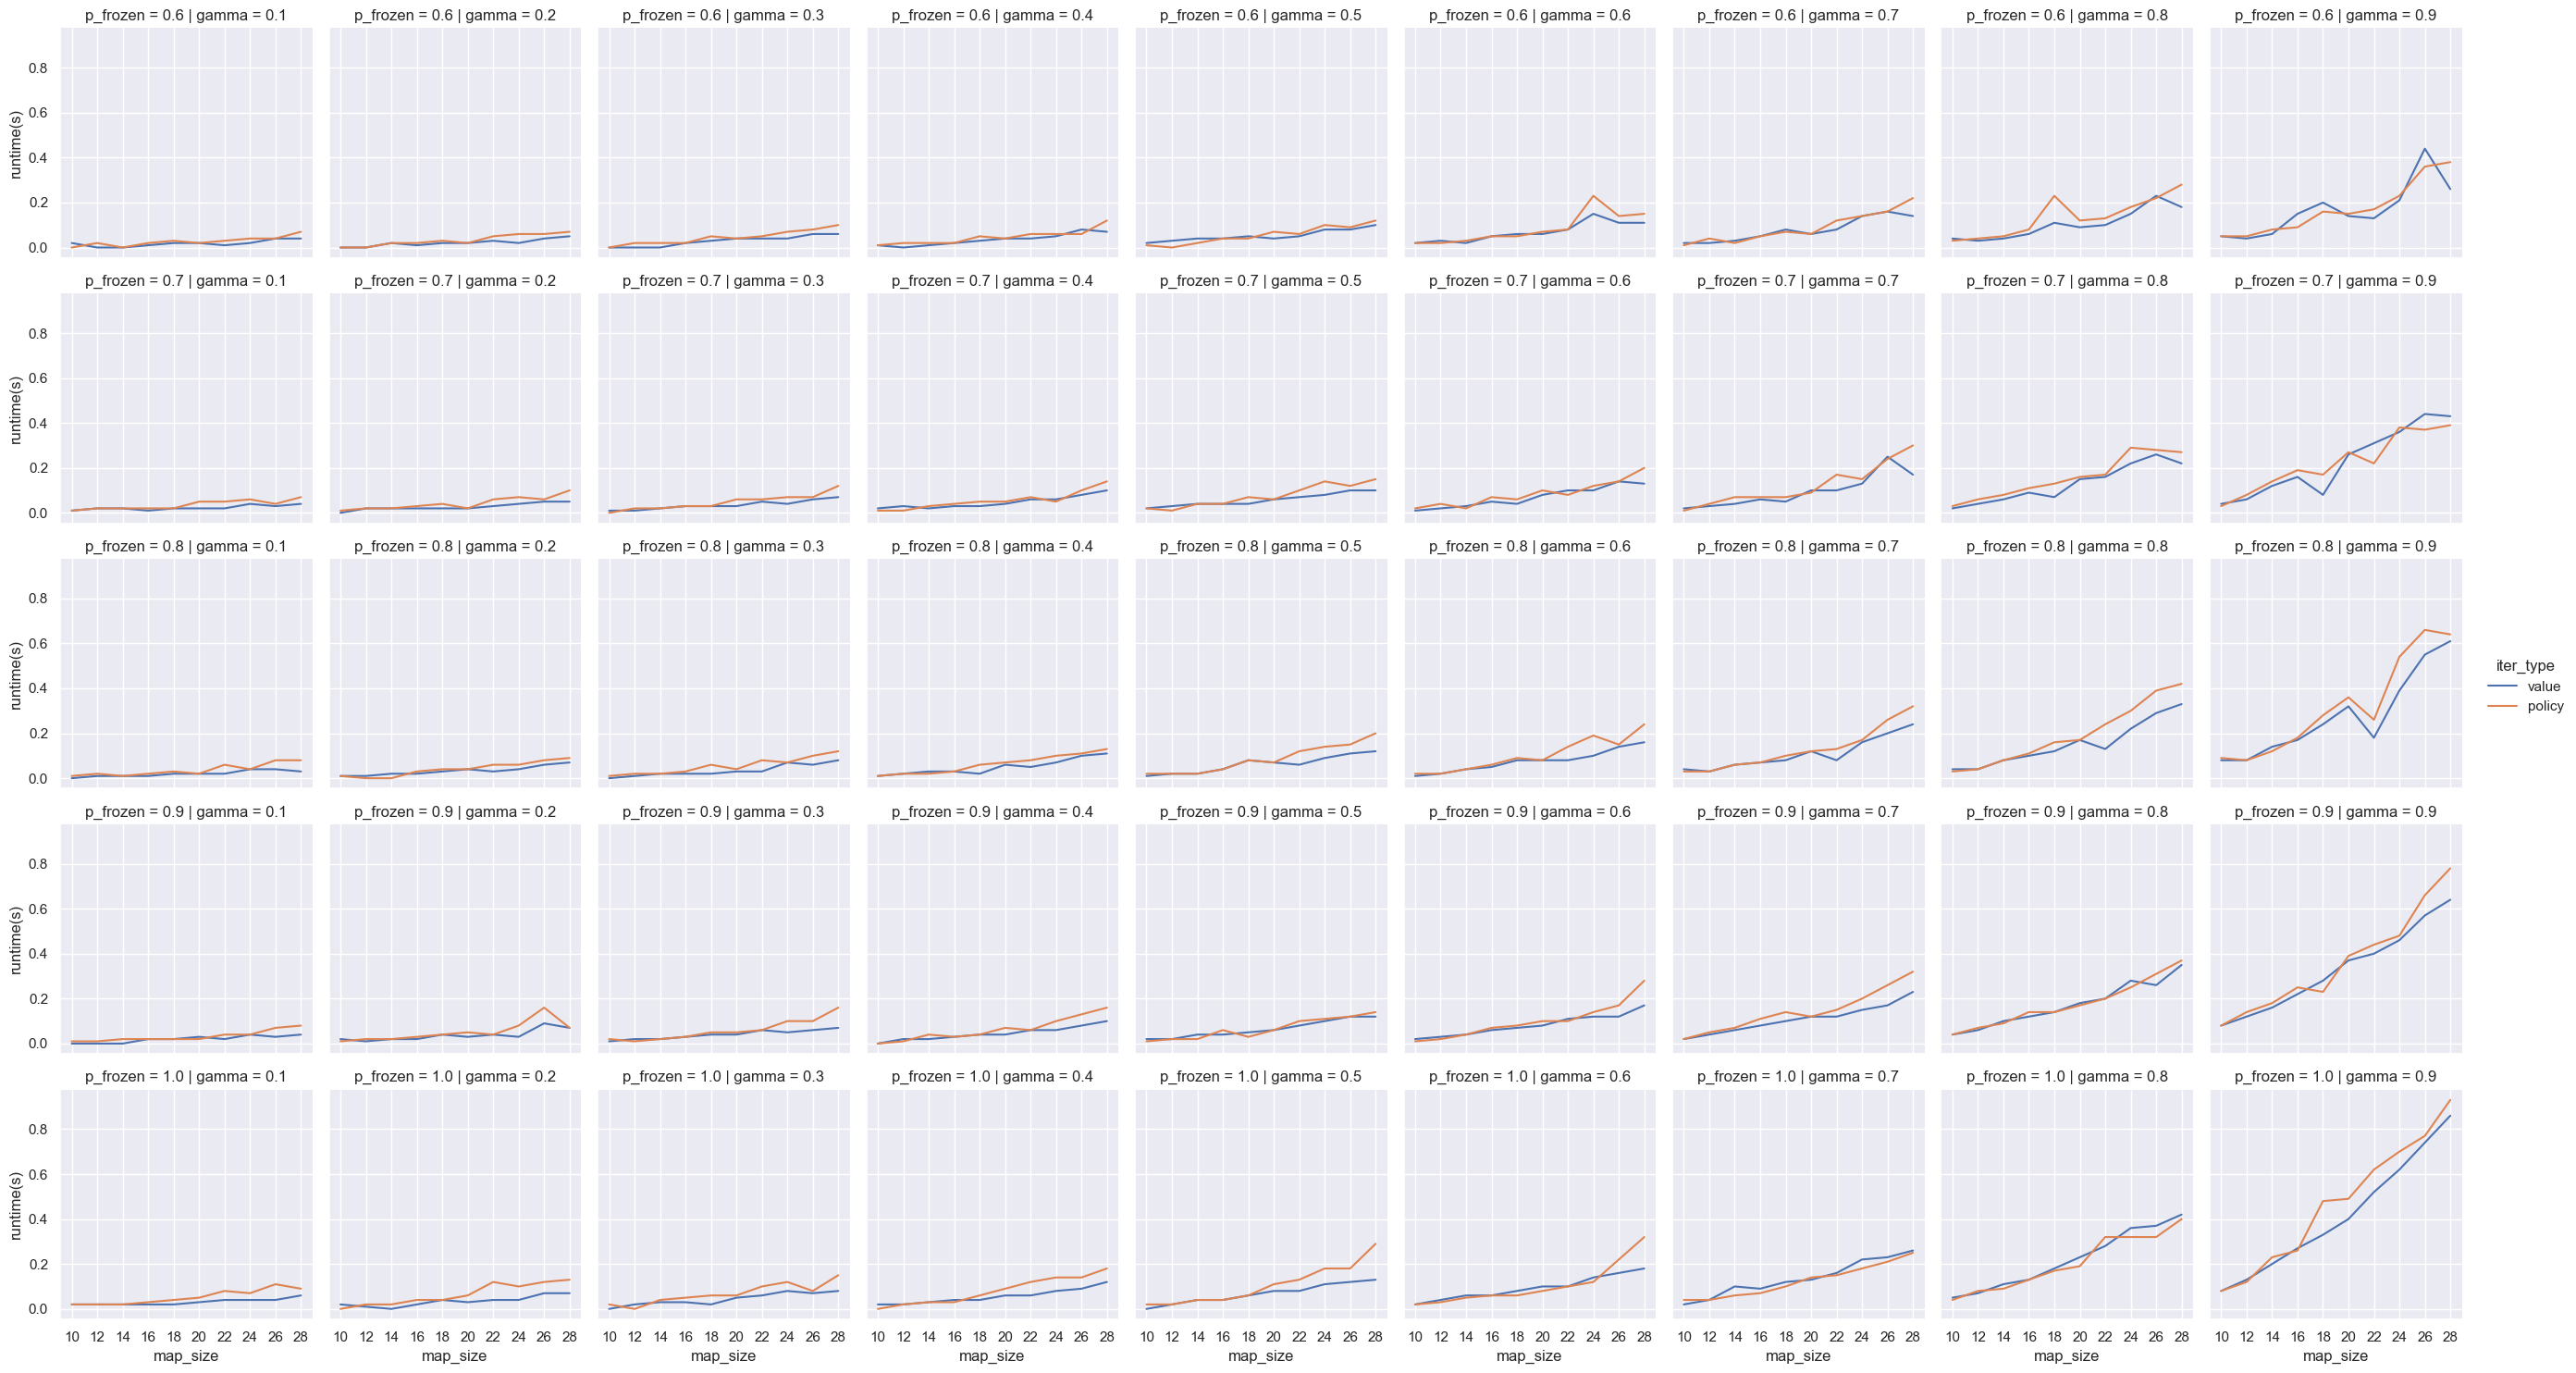

In [17]:
plot_df = runtimes_df.query("move_cost == -0.01 & is_slippery == True")
g = sns.FacetGrid(plot_df, col="gamma", row="p_frozen", hue="iter_type")
g.map(sns.lineplot, "map_size", "runtime(s)").add_legend();

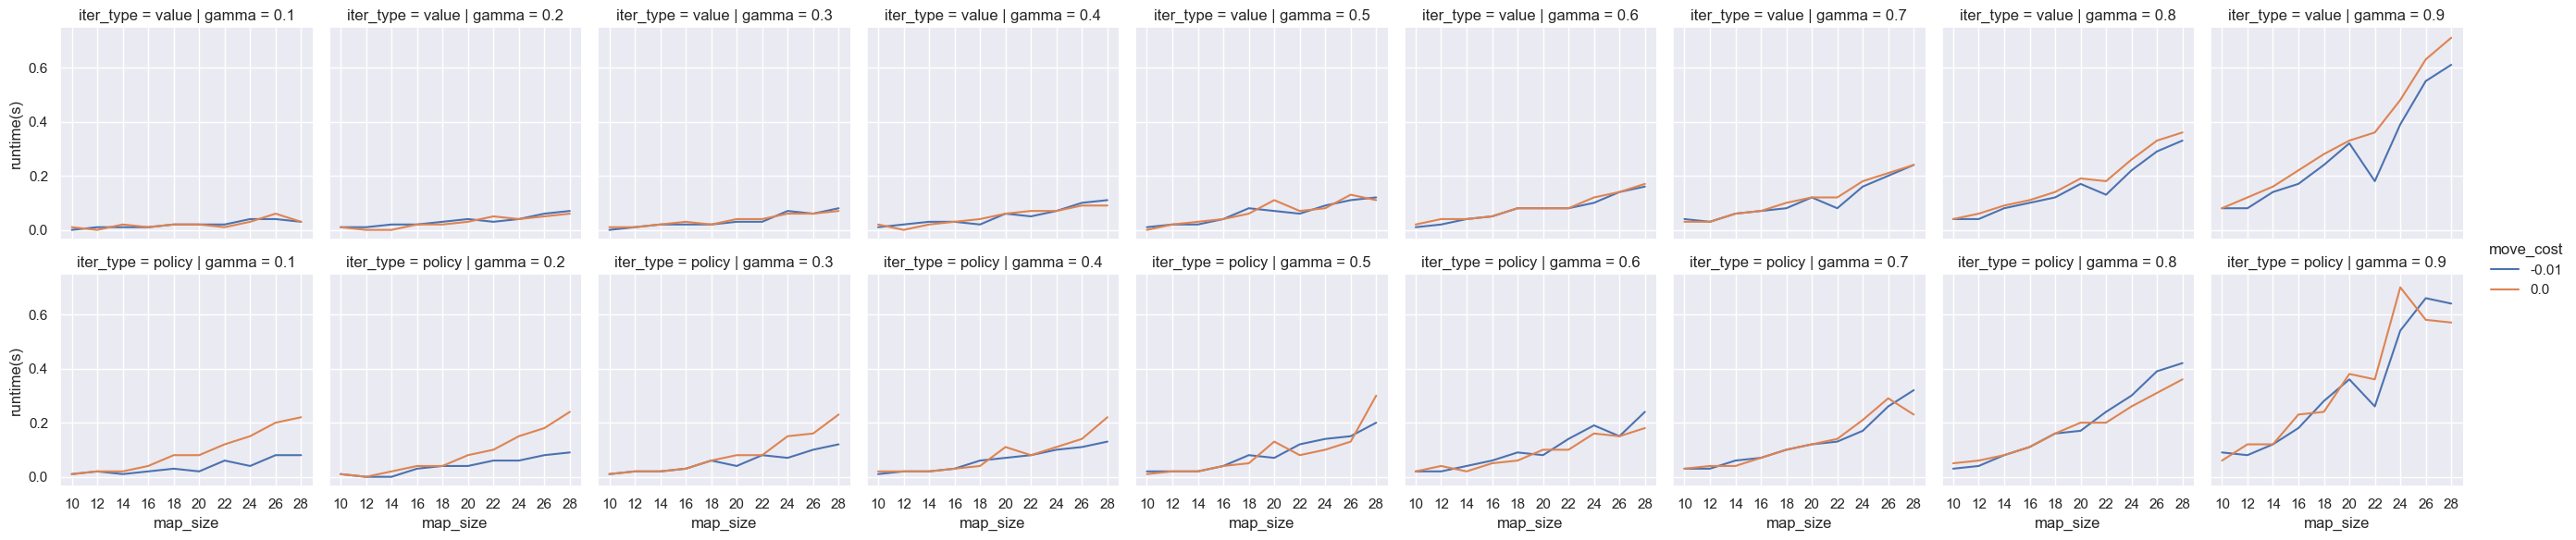

In [18]:
plot_df = runtimes_df.query("p_frozen == 0.8 & is_slippery == True")
g = sns.FacetGrid(plot_df, col="gamma", row="iter_type", hue="move_cost")
g.map(sns.lineplot, "map_size", "runtime(s)").add_legend();